# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [1]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [3]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [4]:
import numpy as np

In [5]:
print(adver_data.head(5))

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [6]:
X = adver_data.drop("Sales", axis=1).values
y = adver_data.Sales.values

In [7]:
print(y[: 5])
print(X[: 5])

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [8]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
print(a[0, 2])
s = np.std(X[:, 1])
print(s)

3
14.809645640595186


In [9]:
means, stds = np.mean(X,axis=0), np.std(X, axis=0)
print(f"means = {means}\nstds = {stds}")

means = [147.0425  23.264   30.554 ]
stds = [85.63933176 14.80964564 21.72410606]


In [9]:
X = np.array([(X[:, 0] - means[0]) / stds[0],
              (X[:, 1] - means[1]) / stds[1],
              (X[:, 2] - means[2]) / stds[2]]).T
print("X:\n", X[:5])




**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [11]:
print()
print()
A =X

In [12]:
X = np.insert(X, 0, np.ones(X[:,0].size), axis=1)#np.append(X, np.reshape(np.ones(X[:,0].size), (200, 1)), axis=1)


In [13]:
print(X[:5])

[[ 1.          0.96985227  0.98152247  1.77894547]
 [ 1.         -1.19737623  1.08280781  0.66957876]
 [ 1.         -1.51615499  1.52846331  1.78354865]
 [ 1.          0.05204968  1.21785493  1.28640506]
 [ 1.          0.3941822  -0.84161366  1.28180188]]


**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [14]:
a = np.array([1, 2, 3])
b = np.array([2, 2, 3])
print(mserror(a, b))

NameError: name 'mserror' is not defined

In [15]:
def mserror(y, y_pred):
    return sum((y_pred - y)**2)/len(y)

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [16]:
answer1 = mserror(y, np.ones(y.size)*np.median(y))
print(answer1)
write_answer_to_file(answer1, '1.txt')

28.34575


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [17]:
X_T = X.T
print(X_T.shape)
Y = X_T.dot(y)
print(np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y)))
print(np.linalg.pinv(X).dot(y))
w = np.linalg.solve(X.T.dot(X), X.T.dot(y))
print(w)
print(np.allclose(X.dot(w), y))
print(X.dot(w)[:5])
print(y[:5])

(4, 200)
[14.0225      3.91925365  2.79206274 -0.02253861]
[14.0225      3.91925365  2.79206274 -0.02253861]
[14.0225      3.91925365  2.79206274 -0.02253861]
False
[20.52397441 12.33785482 12.30767078 17.59782951 13.18867186]
[22.1 10.4  9.3 18.5 12.9]


In [18]:
def normal_equation(big_x, y):
    return np.linalg.inv(np.dot(big_x.T, big_x)).dot(np.dot(big_x.T, y))  # Ваш код здесь

In [19]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [20]:
answer2 = np.dot(np.array([1, 0, 0, 0]), norm_eq_weights)
print(answer2)
write_answer_to_file(answer2, '2.txt')

14.0225


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [21]:
def linear_prediction(X, w):
    return np.dot(X, w)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [22]:
answer3 = mserror(y, linear_prediction(X, norm_eq_weights))
print(answer3)
write_answer_to_file(answer3, '3.txt')

**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [23]:
print(X[:, 0].size)
print(1999%1000)
print(999%1000)

200
999
999


In [24]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    grad0 = (2 / X[:, 0].size) * ((w[3] + w[0]*X[train_ind, 0] + w[1]*X[train_ind, 1] + w[2]*X[train_ind, 2]) - y[train_ind])# Ваш код здесь
    grad1 = grad0 * X[train_ind, 1]# Ваш код здесь
    grad2 = grad0 * X[train_ind, 2]# Ваш код здесь
    grad3 = grad0 * X[train_ind, 3]# Ваш код здесь
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [28]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        w1 = stochastic_gradient_step(X, y, w, random_ind)# Ваш код здесь
        errors.append(mserror(y, linear_prediction(X, w1)))
        if errors[iter_num] <= errors[iter_num -1] and len(errors) != 0:
            w = w1
        if (iter_num % 10000 == 0) and verbose:
            print(f"iter_num = {iter_num}\nw = {w}\nerror = {errors[iter_num]}\n")
        iter_num += 1
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [36]:
%%time
w_init = [0, 0, 0, 0]
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e6,
                                min_weight_dist=1e-8, seed=42, verbose=True)# Ваш код здесь

iter_num = 0
w = [ 0.00148     0.0023012  -0.00131554 -0.00062364]
error = 223.66538899863156

iter_num = 10000
w = [8.54521764 2.4776481  1.8049751  0.72397383]
error = 35.90679692843416



iter_num = 20000
w = [11.51680438  3.29789623  2.51378059  0.96298205]
error = 10.252762312476088

iter_num = 30000
w = [12.69886732  3.62732129  2.68833816  0.84177486]
error = 5.2903920256737775



iter_num = 40000
w = [13.32077733  3.77289082  2.64308256  0.55057744]
error = 3.5811811445362207

iter_num = 50000
w = [13.7782024   3.87626904  2.62690921  0.28186926]
error = 2.9292864201455684



iter_num = 60000
w = [ 1.40196494e+01  3.91737949e+00  2.77358822e+00 -2.26522448e-03]
error = 2.7846255277753587

iter_num = 70000
w = [14.0227238   3.91915573  2.79194755 -0.0225244 ]
error = 2.784126387578989



iter_num = 80000
w = [14.02306892  3.91884017  2.79235461 -0.02263247]
error = 2.784127410564935

iter_num = 90000
w = [14.02304128  3.91903037  2.79246596 -0.0223645 ]
error = 2.78412688569034



iter_num = 100000
w = [14.02263408  3.91907833  2.79221336 -0.02260112]
error = 2.784126381498803

iter_num = 110000
w = [14.02231293  3.91915333  2.79199733 -0.02200446]
error = 2.7841266190673277



iter_num = 120000
w = [14.02287882  3.9193891   2.79219928 -0.02298662]
error = 2.784126647549879

iter_num = 130000
w = [14.02268683  3.91899431  2.79225231 -0.02270718]
error = 2.7841264579586325



iter_num = 140000
w = [14.02264319  3.91913001  2.7925725  -0.02333042]
error = 2.784127038800025

iter_num = 150000
w = [14.02270605  3.9192429   2.7923297  -0.02297498]
error = 2.784126536487672



iter_num = 160000
w = [14.02266963  3.91912792  2.79229962 -0.02267682]
error = 2.7841267020896097

iter_num = 170000
w = [14.02237882  3.91952264  2.79190329 -0.02211611]
error = 2.7841272172579807



iter_num = 180000
w = [14.02259381  3.91915841  2.7919413  -0.02226605]
error = 2.7841266291521207

iter_num = 190000
w = [14.02265573  3.91913696  2.79239477 -0.02279578]
error = 2.7841269110790448



iter_num = 200000
w = [14.02254809  3.91919045  2.79221533 -0.02268254]
error = 2.784126349236999

iter_num = 210000
w = [14.02302339  3.91949957  2.79231893 -0.02252617]
error = 2.784126917070322



iter_num = 220000
w = [14.02275804  3.91954209  2.79172016 -0.02243406]
error = 2.784126559800484

iter_num = 230000
w = [14.02298757  3.91931708  2.79216969 -0.02254573]
error = 2.7841265678946208



iter_num = 240000
w = [14.02298839  3.91953661  2.79250653 -0.02278555]
error = 2.7841268192579247

iter_num = 250000
w = [14.02209861  3.91954786  2.79188228 -0.02222372]
error = 2.784126658337994



iter_num = 260000
w = [14.02272412  3.91935842  2.79217705 -0.02277775]
error = 2.784126425086313

iter_num = 270000
w = [14.02256494  3.91910698  2.79207321 -0.02220212]
error = 2.7841264507406875



iter_num = 280000
w = [14.02244714  3.91886781  2.792096   -0.02260667]
error = 2.7841267035329658

iter_num = 290000
w = [14.02262212  3.91983512  2.792247   -0.02258917]
error = 2.784126705856861



iter_num = 300000
w = [14.02271364  3.91931819  2.79195011 -0.02261863]
error = 2.784126449366264

iter_num = 310000
w = [14.0229573   3.91882302  2.79211441 -0.02262106]
error = 2.784126741525634



iter_num = 320000
w = [14.0224725   3.91933187  2.79196328 -0.02248188]
error = 2.784126378993052

iter_num = 330000
w = [14.02305896  3.91823727  2.79184109 -0.02288429]
error = 2.784127947358935



iter_num = 340000
w = [14.02231146  3.9191845   2.79192505 -0.02276696]
error = 2.7841264510445627

iter_num = 350000
w = [14.02290497  3.91869638  2.79212589 -0.02231043]
error = 2.7841269226977885



iter_num = 360000
w = [14.02262764  3.91913242  2.79251625 -0.02258086]
error = 2.784126533934324

iter_num = 370000
w = [14.02282321  3.91912094  2.79226468 -0.02225082]
error = 2.7841265940868483



iter_num = 380000
w = [14.0226465   3.91928786  2.79204866 -0.0223851 ]
error = 2.7841263599162627

iter_num = 390000
w = [14.0230543   3.91873401  2.79249734 -0.02240506]
error = 2.784127112104407



iter_num = 400000
w = [14.02328403  3.91923568  2.79226529 -0.02230254]
error = 2.784127059283187

iter_num = 410000
w = [14.02333004  3.91957144  2.79244401 -0.022225  ]
error = 2.784127457422665



iter_num = 420000
w = [14.02292618  3.91979935  2.79220491 -0.02267143]
error = 2.7841268186910595

iter_num = 430000
w = [14.02307789  3.91905964  2.79204882 -0.02234   ]
error = 2.784127105225324



iter_num = 440000
w = [14.02267834  3.91931611  2.79284678 -0.02290297]
error = 2.7841269198456176

iter_num = 450000
w = [14.02294924  3.91983199  2.79232393 -0.02254477]
error = 2.7841270436784873



iter_num = 460000
w = [14.02291206  3.91928771  2.79283794 -0.02248435]
error = 2.784127122233467

iter_num = 470000
w = [14.02281513  3.91885738  2.79196583 -0.02259724]
error = 2.784126594542262



iter_num = 480000
w = [14.02254263  3.91928312  2.79231163 -0.02265955]
error = 2.7841263728526195

iter_num = 490000
w = [14.02298421  3.9194922   2.79232724 -0.02236071]
error = 2.7841269504262094



iter_num = 500000
w = [14.02266568  3.91940894  2.79209976 -0.02270092]
error = 2.7841264701358286

iter_num = 510000
w = [14.02261012  3.91930372  2.79175866 -0.0225351 ]
error = 2.7841264234900382



iter_num = 520000
w = [14.02305101  3.9187386   2.79195223 -0.02212305]
error = 2.784127347940779

iter_num = 530000
w = [14.02217685  3.91909917  2.79105371 -0.02249161]
error = 2.784127445836565



iter_num = 540000
w = [14.02262836  3.91868079  2.79226677 -0.02349984]
error = 2.7841279231429974

iter_num = 550000
w = [14.02266673  3.91914387  2.79220375 -0.02291172]
error = 2.7841265634055663



iter_num = 560000
w = [14.02256988  3.91913195  2.79179007 -0.02247335]
error = 2.784126402951425

iter_num = 570000
w = [14.02241775  3.91943411  2.79166297 -0.02225741]
error = 2.784126510959798



iter_num = 580000
w = [14.02274043  3.91920663  2.79192095 -0.02224977]
error = 2.78412644825386

iter_num = 590000
w = [14.02240646  3.91870778  2.7920194  -0.02318253]
error = 2.7841275398822165



iter_num = 600000
w = [14.02264959  3.91920314  2.79192704 -0.0222341 ]
error = 2.7841265240460586

iter_num = 610000
w = [14.02291489  3.91918462  2.79221765 -0.02284658]
error = 2.7841281271686023



iter_num = 620000
w = [14.0224273   3.91920253  2.79219016 -0.02275695]
error = 2.7841266128382838

iter_num = 630000
w = [14.02273876  3.91940121  2.79201826 -0.0223088 ]
error = 2.784126485155875



iter_num = 640000
w = [14.02247348  3.91910776  2.79219711 -0.02291661]
error = 2.784126486196067

iter_num = 650000
w = [14.02264683  3.91897792  2.79206097 -0.02245329]
error = 2.784126416666006



iter_num = 660000
w = [14.02272183  3.91908957  2.79182273 -0.0222961 ]
error = 2.784126500370749

iter_num = 670000
w = [14.02285272  3.91952637  2.79179314 -0.02234913]
error = 2.784126610844402



iter_num = 680000
w = [14.02249442  3.91926075  2.79190654 -0.02257444]
error = 2.784126594467036

iter_num = 690000
w = [14.02222389  3.91874808  2.79160766 -0.02221946]
error = 2.7841271686938422



iter_num = 700000
w = [14.02278333  3.91924341  2.79203838 -0.02260749]
error = 2.7841264143546245

iter_num = 710000
w = [14.02273     3.91914449  2.79212509 -0.02251761]
error = 2.784126558497923



iter_num = 720000
w = [14.02274719  3.91896145  2.79262233 -0.02261615]
error = 2.784126734053947

iter_num = 730000
w = [14.02234585  3.91887872  2.79220058 -0.0227332 ]
error = 2.784126519321916



iter_num = 740000
w = [14.02255075  3.9192806   2.79215284 -0.02268463]
error = 2.784126337755404

iter_num = 750000
w = [14.02223504  3.91977868  2.79213679 -0.02219156]
error = 2.7841280050830335



iter_num = 760000
w = [14.02273362  3.91892202  2.79199627 -0.02258728]
error = 2.7841266182550983

iter_num = 770000
w = [14.02239668  3.91887553  2.79249592 -0.02231344]
error = 2.784126759088608



iter_num = 780000
w = [14.02326589  3.91914811  2.79192459 -0.02276174]
error = 2.7841270072171627

iter_num = 790000
w = [14.02302977  3.91901334  2.79211946 -0.02251024]
error = 2.7841267144102435



iter_num = 800000
w = [14.02223883  3.91930849  2.79197007 -0.02206908]
error = 2.78412660242766

iter_num = 810000
w = [14.02267701  3.91913266  2.7921628  -0.02251895]
error = 2.7841264200808538



iter_num = 820000
w = [14.02259328  3.91862285  2.79214519 -0.02242048]
error = 2.7841267917267465

iter_num = 830000
w = [14.02286133  3.91971679  2.79238129 -0.02227065]
error = 2.784126923522599



iter_num = 840000
w = [14.02278321  3.91941856  2.79223954 -0.02256323]
error = 2.7841264661422214

iter_num = 850000
w = [14.0223451   3.91904385  2.79213047 -0.02279129]
error = 2.784126443285853



iter_num = 860000
w = [14.02269532  3.91923995  2.79216942 -0.02279191]
error = 2.7841270288511955

iter_num = 870000
w = [14.02252789  3.91927544  2.79201878 -0.02243753]
error = 2.7841263249110146



iter_num = 880000
w = [14.02261542  3.9188791   2.79203132 -0.02278073]
error = 2.7841266113062404

iter_num = 890000
w = [14.02261177  3.91910707  2.79223386 -0.02286977]
error = 2.784126498615546



iter_num = 900000
w = [14.02266378  3.91918987  2.79207243 -0.02239689]
error = 2.7841263654611232

iter_num = 910000
w = [14.02256885  3.91923307  2.79220782 -0.02282779]
error = 2.78412645564027



iter_num = 920000
w = [14.02242098  3.91942968  2.79190323 -0.02222212]
error = 2.78412644482721

iter_num = 930000
w = [14.02312422  3.91886683  2.7928799  -0.02284783]
error = 2.7841276989841113



iter_num = 940000
w = [14.02282252  3.91913584  2.79196978 -0.02234456]
error = 2.78412647257331

iter_num = 950000
w = [14.0226145   3.91924069  2.79234313 -0.02266714]
error = 2.7841263971916947



iter_num = 960000
w = [14.02272061  3.91901866  2.79232235 -0.02265521]
error = 2.784126474374658

iter_num = 970000
w = [14.02280226  3.91933914  2.79307992 -0.02318506]
error = 2.7841284781324713



iter_num = 980000
w = [14.0224177   3.91852937  2.79174903 -0.02264663]
error = 2.7841273903699344

iter_num = 990000
w = [14.02242354  3.91938701  2.79231843 -0.02331689]
error = 2.784127091740978



Wall time: 17.6 s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

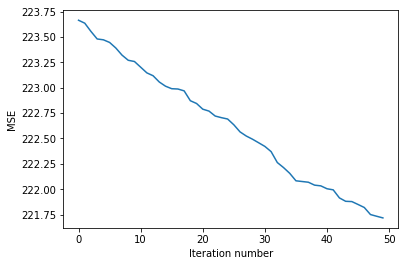

In [30]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

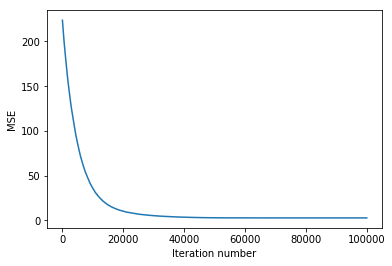

In [31]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [32]:
stoch_grad_desc_weights

array([14.02261758,  3.9190653 ,  2.79221254, -0.02258094])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [33]:
stoch_errors_by_iter[-1]

2.7841270347076557

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [34]:
answer4 = mserror(y, linear_prediction(X, stoch_grad_desc_weights))# Ваш код здесь
print(answer4)
write_answer_to_file(answer4, '4.txt')

2.7841263813658577


**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**